OVERVIEW:

In this tutorial notebook, we will optimize of the maintenance of trees in the city of Paris. We will  analyze the height of trees in the city and their distribution by district and by tree species.

Steps are:
- We will work with "arbes-fr.csv" dataset
- We will perform EDA
- The maximum height of the trees in Paris is 62.5m.
- The maximum  circumference in Paris is 1300 cm.

- Finally we will use the folium module to detect the location of trees of different spicies in Paris.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

%matplotlib inline

In [2]:
data = pd.read_csv("arbres-fr.csv", sep=";")
data.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [3]:
data.shape

(200137, 18)

In [4]:
data.columns

Index(['id', 'type_emplacement', 'domanialite', 'arrondissement',
       'complement_addresse', 'numero', 'lieu', 'id_emplacement',
       'libelle_francais', 'genre', 'espece', 'variete', 'circonference_cm',
       'hauteur_m', 'stade_developpement', 'remarquable', 'geo_point_2d_a',
       'geo_point_2d_b'],
      dtype='object')

### We plot the percentage of different spicies of trees in Paris.

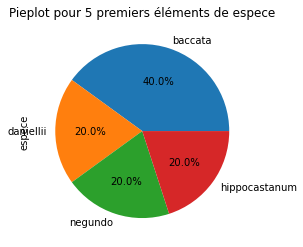

In [5]:
data['espece'][0:5].value_counts().plot.pie(center=(0, 0), radius=1.0, autopct='%1.1f%%').set_title('Pieplot pour 5 premiers éléments de espece');

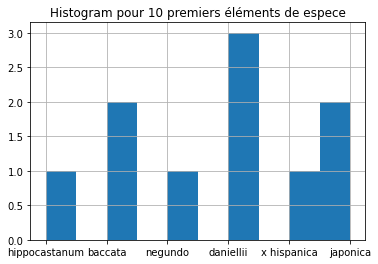

In [6]:
data['espece'][0:10].hist().set_title('Histogram pour 10 premiers éléments de espece');

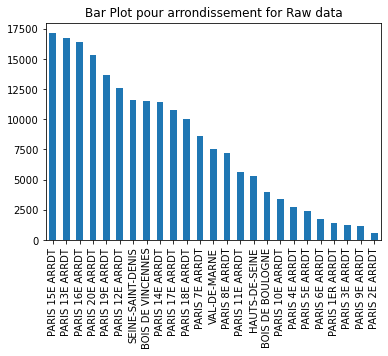

In [7]:
data['arrondissement'].value_counts().plot.bar().set_title('Bar Plot pour arrondissement for Raw data');

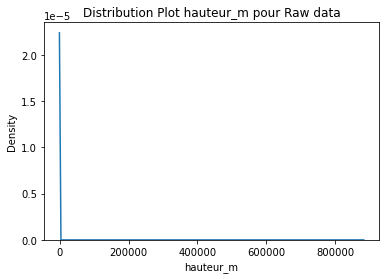

In [8]:
sns.kdeplot(data['hauteur_m']).set_title('Distribution Plot hauteur_m pour Raw data');

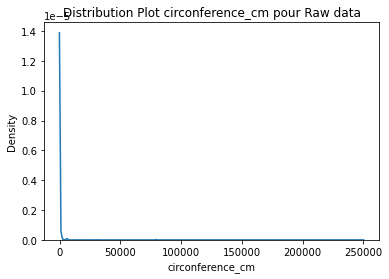

In [9]:
sns.kdeplot(data['circonference_cm']).set_title('Distribution Plot circonference_cm pour Raw data');

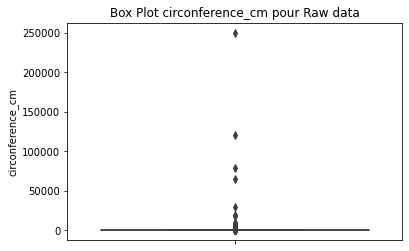

In [10]:
sns.boxplot(y='circonference_cm', data=data).set_title('Box Plot circonference_cm pour Raw data');

### From the net we see that the maximum hieigt of the trees in Paris is 62.5 meters. So we fiter the data.

In [11]:
data = data[data['hauteur_m']<= 62.5]

In [12]:
data.hauteur_m.describe()

count    199749.000000
mean          8.347456
std           6.260809
min           0.000000
25%           5.000000
50%           8.000000
75%          12.000000
max          60.000000
Name: hauteur_m, dtype: float64

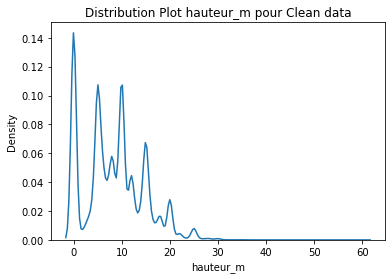

In [13]:
sns.kdeplot(data['hauteur_m']).set_title('Distribution Plot hauteur_m pour Clean data');

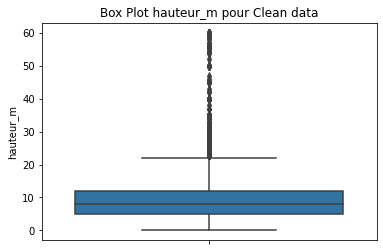

In [14]:
sns.boxplot(y='hauteur_m', data=data).set_title('Box Plot hauteur_m pour Clean data');

### From the net we see that the maximum circonference of the trees in Paris is 1300 cm. So we fiter the data in terms of circumference.

In [15]:
df = data[data['circonference_cm']<= 1300]

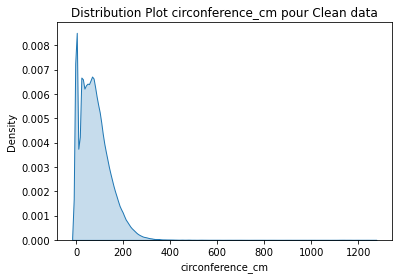

In [16]:
sns.kdeplot(df['circonference_cm'], fill=True).set_title('Distribution Plot circonference_cm pour Clean data');

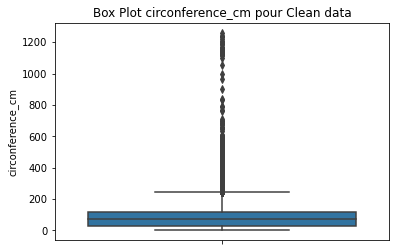

In [17]:
sns.boxplot(y='circonference_cm', data=df).set_title('Box Plot circonference_cm pour Clean data');

#### Also we get rid of the columns 'id', 'complement_addresse', 'numero', 'lieu', 'id_emplacement' as it is not ofany use to us.

In [18]:
data = data.drop(['id', 'complement_addresse', 'numero', 'lieu', 'id_emplacement'], axis=1)

In [19]:
data.columns

Index(['type_emplacement', 'domanialite', 'arrondissement', 'libelle_francais',
       'genre', 'espece', 'variete', 'circonference_cm', 'hauteur_m',
       'stade_developpement', 'remarquable', 'geo_point_2d_a',
       'geo_point_2d_b'],
      dtype='object')

### We have divided the tree database between heights 0 to 3 meters, 3 to 20 meters, 20 to 30 meters and over 30 meters. 

--First, we analyze the height from 0 to 3 meters compared to the PARIS 7E arrondissement

In [20]:
d_1 = data[(data['hauteur_m']<=3) & (data['arrondissement']=='PARIS 7E ARRDT')]

-- We analyze the height of trees between 3 and 20 meters in PARIS 7E arrodiment

In [21]:
d_2 = data[(data['hauteur_m']>3) & (data['hauteur_m']<=20) & (data['arrondissement']=='PARIS 7E ARRDT')]

-- We analyze the height of trees between 20 to 30 meters in PARIS 7E arrodiment

In [22]:
d_3 = data[(data['hauteur_m']>20) & (data['hauteur_m']<=30) & (data['arrondissement']=='PARIS 7E ARRDT')]

-- We analyze the height of trees above 30 meters in PARIS 7E arrodiment

In [23]:
d_4 = data[(data['hauteur_m']>30) & (data['arrondissement']=='PARIS 7E ARRDT')]

### Now we want to find the places where the trees from 0 to 3 meters are located. For this we will use the folium module

In [24]:
m_1 = folium.Map(location=[48.854863, 2.300805], zoom_start=15) 

In [25]:
for i,row in d_1.iterrows():
    geo_point_2d_a = d_1.at[i, 'geo_point_2d_a']
    geo_point_2d_b = d_1.at[i, 'geo_point_2d_b']
    espece = d_1.at[i, 'espece']
    folium.Marker(location=[geo_point_2d_a, geo_point_2d_b], popup=espece, icon=folium.Icon(color='red')).add_to(m_1)

In [26]:
m_1.save('m_1.html')

#### Now we want to find the places where the trees from 3 to 20 meters are located.

In [27]:
m_2 = folium.Map(location=[48.857620, 2.320962], zoom_start=15) 

In [28]:
for i,row in d_2.iterrows():
    geo_point_2d_a = d_2.at[i, 'geo_point_2d_a']
    geo_point_2d_b = d_2.at[i, 'geo_point_2d_b']
    espece = d_2.at[i, 'espece']
    folium.Marker(location=[geo_point_2d_a, geo_point_2d_b], popup=espece, icon=folium.Icon(color='green')).add_to(m_2)

In [29]:
m_2.save('m_2.html')

####  Now we want to find the places where the trees from 20 to 30 meters are located.

In [30]:
m_3 = folium.Map(location=[48.857453, 2.320804], zoom_start=15) 

In [31]:
for i,row in d_3.iterrows():
    geo_point_2d_a = d_3.at[i, 'geo_point_2d_a']
    geo_point_2d_b = d_3.at[i, 'geo_point_2d_b']
    espece = d_3.at[i, 'espece']
    folium.Marker(location=[geo_point_2d_a, geo_point_2d_b], popup=espece, icon=folium.Icon(color='blue')).add_to(m_3)

In [32]:
m_3.save('m_3.html')

In [33]:
m_4 = folium.Map(location=[48.854385, 2.310478], zoom_start=15) 

In [34]:
for i,row in d_4.iterrows():
    geo_point_2d_a = d_4.at[i, 'geo_point_2d_a']
    geo_point_2d_b = d_4.at[i, 'geo_point_2d_b']
    espece = d_4.at[i, 'espece']
    folium.Marker(location=[geo_point_2d_a, geo_point_2d_b], popup=espece, icon=folium.Icon(color='purple')).add_to(m_4)

In [35]:
m_4.save('m_4.html')